In [1]:
import photoevolver as ph
import Mors as mors
import matplotlib.pyplot as plt
from photoevolver import models
from photoevolver.planet import Planet

In [8]:
planet = Planet(mass = 1.0, radius = 3.0, period = 5.0)
method = "rk45"

In [9]:
planet.set_models(
    core_model = models.core_otegi20,
    envelope_model = models.envelope_chen16,
    mass_loss_model = models.massloss_energy_limited,
    star_model = {
        'mass': 1.0,
        'lx'   : lambda state,mkw: 1e28, # erg/s
        'leuv' : lambda state,mkw: 1e28, # erg/s
        'lbol' : lambda state,mkw: 1e33
    },
    # model_args = dict(ot20_errors = False)
)

In [10]:
evo_rk45  = planet.evolve(start=10.0, end=100.0, step=0.1, progressbar=True, method="rk45")
evo_eulr  = planet.evolve(start=10.0, end=100.0, step=0.1, progressbar=True, method="euler")

99.553%|████████████████████████████████████████████████████████████████████████████████████████▌| 89.597/90.0 [00:00<00:00]
99.889%|████████████████████████████████████████████████████████████████████████████████████████▉| 89.900/90.0 [00:00<00:00]


In [11]:
p2_rk45 = Planet(mass = evo_rk45['mass'].iloc[-1], radius = evo_rk45['radius'].iloc[-1], period = planet.initial_state.period)
p2_rk45.use_models(planet)
evo2_rk45 = p2_rk45.evolve(start=100.0, end=10.0, step=0.1, progressbar=True, method="rk45")

p2_eulr = Planet(mass = evo_eulr['mass'].iloc[-1], radius = evo_eulr['radius'].iloc[-1], period = planet.initial_state.period)
p2_eulr.use_models(planet)
evo2_eulr = p2_eulr.evolve(start=100.0, end=10.0, step=0.1, progressbar=True, method="euler")

99.000%|████████████████████████████████████████████████████████████████████████████████████████ | 89.100/90.0 [00:00<00:00]
99.000%|████████████████████████████████████████████████████████████████████████████████████████ | 89.100/90.0 [00:00<00:00]/home/jorge/dev/.venv/lib/python3.10/site-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100.111%|████████████████████████████████████████████████████████████████████████████████████████| 90.100/90.0 [00:00<00:00]


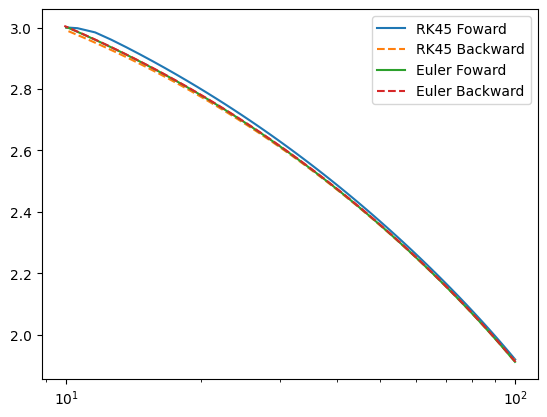

In [14]:
plt.plot(evo_rk45['age'],  evo_rk45['radius'],  label="RK45 Foward")
plt.plot(evo2_rk45['age'], evo2_rk45['radius'], label="RK45 Backward", ls='--')

plt.plot(evo_eulr['age'],  evo_eulr['radius'],  label="Euler Foward")
plt.plot(evo2_eulr['age'], evo2_eulr['radius'], label="Euler Backward", ls='--')

plt.xscale("log")
plt.legend()
plt.show()